In [73]:
import seaborn as sns
import pandas as pd
import os
from matplotlib import pyplot
sns.set_style("whitegrid")
%matplotlib inline

In [74]:
def PlotErrors(folder):
    dataset = pd.read_csv("{}/LSTM-Naive.csv".format(folder))
    pyplot.clf()
    ax = sns.violinplot(x="State",
                         y="Error",
                         hue="Model",
                         data=dataset,
                         palette="muted",
                         split=False)
    pyplot.savefig('{}/{}.png'.format(folder, "violinplots"))

In [75]:
for i in range(10):
#     os.mkdir("{}".format(i))
    files = list(filter(lambda x: ".csv" in x, os.listdir("../Experiments/{}".format(i))))
    with open("{}/LSTM-Naive.csv".format(i), "w") as outputFile:
        outputFile.write("State,Model,Error\n")
        for file in files:
            newFile = file.replace("Predictions-", "Naive_")

            LSTMFile = pd.read_csv("../Experiments/{}/{}".format(i, file))["Error"].values
            NaiveFile = pd.read_csv("../../../Naive/Mexico/{}".format(newFile))["Error"].values[4:]
            state = file.replace("Predictions-", "").replace("_2016-2018.csv", "")

            for j in range(len(LSTMFile)):
                outputFile.write("{},LSTM,{}\n".format(state, float(LSTMFile[j])))
            for j in range(len(NaiveFile)):
                outputFile.write("{},Naive,{}\n".format(state, float(NaiveFile[j])))

Chiapas
Guerrero
QuintanaRoo
Guerrero
QuintanaRoo
Tabasco
Hidalgo
Tabasco
Yucatan
NuevoLeon
QuintanaRoo
Yucatan
Colima
Oaxaca
Veracruz
Chiapas
Oaxaca
Tabasco
Colima
Tabasco
Veracruz
Oaxaca
Tabasco
Veracruz
NuevoLeon
Oaxaca
Tabasco
Hidalgo
Oaxaca
Yucatan


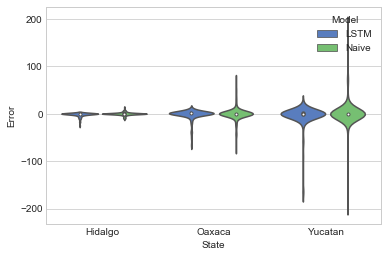

In [77]:
for i in range(10):
    PlotErrors("{}".format(i))